# Model Klasifikasi Popularitas Tempat Wisata

Dengan Output Label “Popular” atau “Not Popular”

## Import Library


In [ ]:
# Analisis Data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Evaluasi & Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Machine Learning - Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import nltk
import joblib
# NLP (Text Processing)
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Google Colab
from google.colab import files

In [ ]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('tagsets')
!python -m textblob.download_corpora

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
# Meng-upload file
uploaded = files.upload()

Saving package_tourism.csv to package_tourism (1).csv
Saving tourism_rating.csv to tourism_rating (1).csv
Saving tourism_with_id.csv to tourism_with_id (1).csv
Saving user.csv to user (1).csv


## Read Dataset


In [ ]:
# Membaca dataset
df_user = pd.read_csv('user.csv')
df_tourism = pd.read_csv('tourism_with_id.csv')
df_rating = pd.read_csv('tourism_rating.csv')
df_package = pd.read_csv('package_tourism.csv')

#### Menampilkan Sekilas Dataset

In [ ]:
print("User Dataset:")
print(df_user.head(), "\n")

print("Tourism Dataset (with ID):")
print(df_tourism.head(), "\n")

print("Tourism Rating Dataset:")
print(df_rating.head(), "\n")

print("Package Tourism Dataset:")
print(df_package.head(), "\n")

User Dataset:
   User_Id                   Location  Age
0        1      Semarang, Jawa Tengah   20
1        2         Bekasi, Jawa Barat   21
2        3        Cirebon, Jawa Barat   23
3        4         Bekasi, Jawa Barat   21
4        5  Lampung, Sumatera Selatan   20 

Tourism Dataset (with ID):
   Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   

                                         Description       Category     City  \
0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya  Jakarta   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan  Jakarta   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Taman Hiburan  Jakarta  

In [ ]:
df_user.describe(include='all')

,User_Id,Location,Age
count,300.000000,300,300.000000
unique,NaN,28,NaN
top,NaN,"Bekasi, Jawa Barat",NaN
freq,NaN,39,NaN
mean,150.500000,NaN,28.700000
std,86.746758,NaN,6.393716
min,1.000000,NaN,18.000000
25%,75.750000,NaN,24.000000
50%,150.500000,NaN,29.000000
75%,225.250000,NaN,34.000000


### Statistik Dataset Rating Wisata

In [ ]:
df_rating.describe(include='all')

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


## Exploratory Data Analysis

### Informasi Dataset

In [ ]:
print("Info User Dataset:")
print(df_user.info(), "\n")

print("Info Tourism Dataset:")
print(df_tourism.info(), "\n")

print("Info Tourism Rating Dataset:")
print(df_rating.info(), "\n")

print("Info Package Tourism Dataset:")
print(df_package.info(), "\n")

Info User Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB
None 

Info Tourism Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-nul

### Pembersihan Kolom

In [ ]:
# Kolom tidak relevan untuk klasifikasi popularitas
columns_to_drop = [
    'Description',      # Deskripsi panjang
    'Coordinate',       # Duplikat informasi lat/long
    'Lat', 'Long',      # Lokasi geografis, diabaikan untuk model sederhana
    'Unnamed: 11', 'Unnamed: 12'  # Kolom kosong/error
]

# Hapus kolom yang tidak relevan (jika ada di DataFrame)
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)


### Pengecekan Nilai Bias

In [ ]:
print("Missing values in df_package:\n", df_package.isnull().sum())
print("\nMissing values in df_rating:\n", df_rating.isnull().sum())
print("\nMissing values in df_tourism:\n", df_tourism.isnull().sum())
print("\nMissing values in df_user:\n", df_user.isnull().sum())

Missing values in df_package:
 Package            0
City               0
Place_Tourism1     0
Place_Tourism2     0
Place_Tourism3     0
Place_Tourism4    34
Place_Tourism5    61
dtype: int64

Missing values in df_rating:
 User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

Missing values in df_tourism:
 Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

Missing values in df_user:
 User_Id     0
Location    0
Age         0
dtype: int64


### Pengecekan Data Dupli

In [ ]:
print("Duplicates in df_package:", df_package.duplicated().sum())
print("Duplicates in df_rating:", df_rating.duplicated().sum())
print("Duplicates in df_tourism:", df_tourism.duplicated().sum())
print("Duplicates in df_user:", df_user.duplicated().sum())

Duplicates in df_package: 0
Duplicates in df_rating: 79
Duplicates in df_tourism: 0
Duplicates in df_user: 0


### Visualisasi Distribusi Fitur Numerik

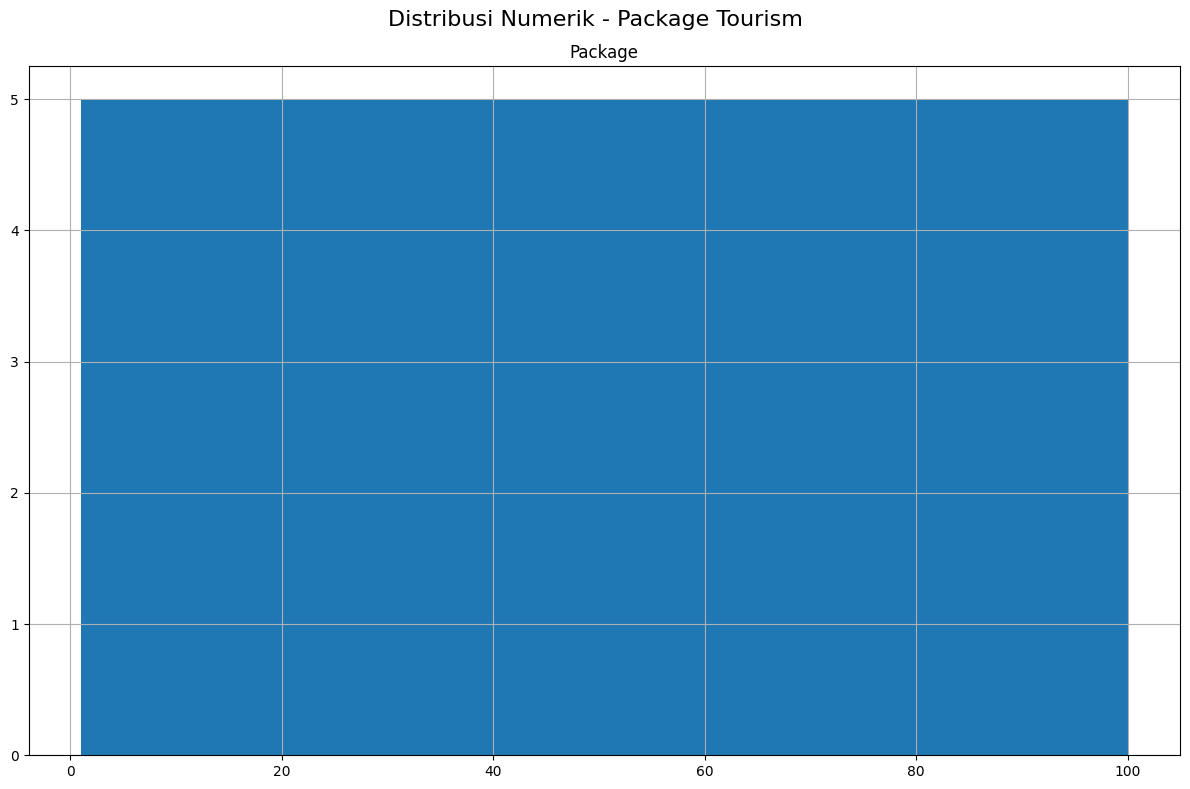

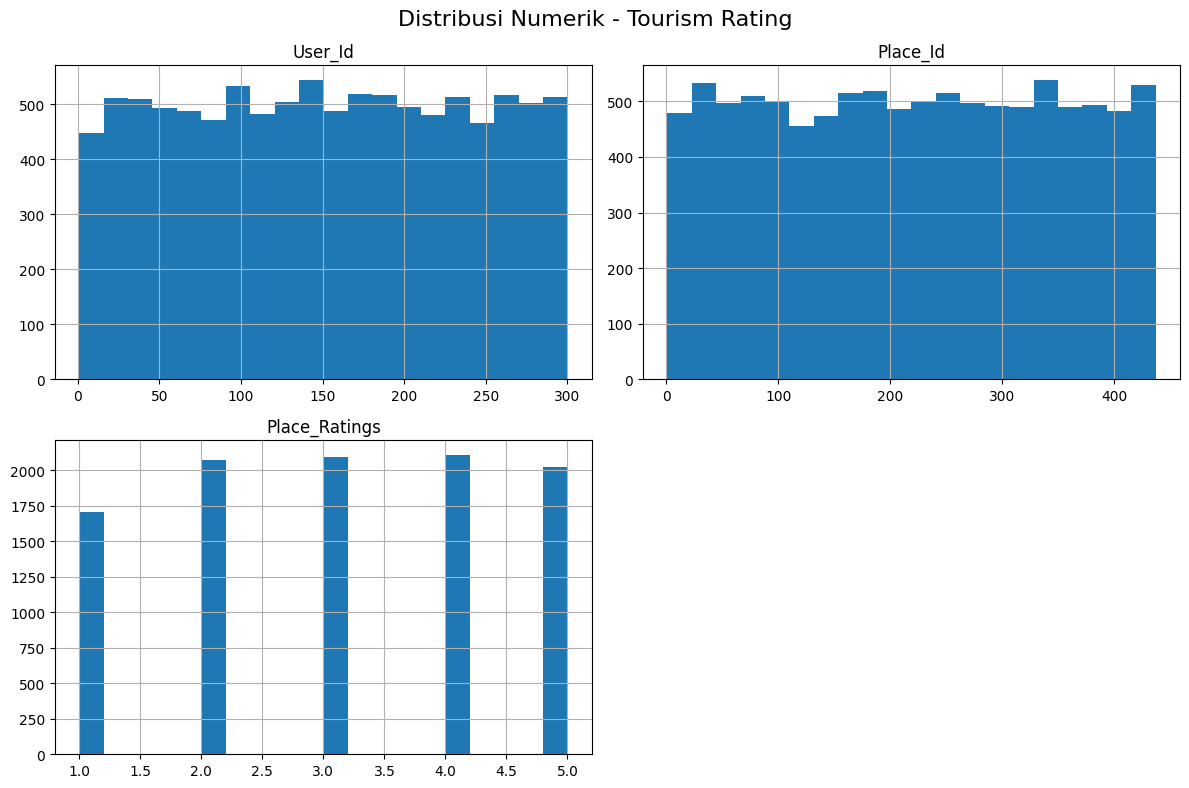

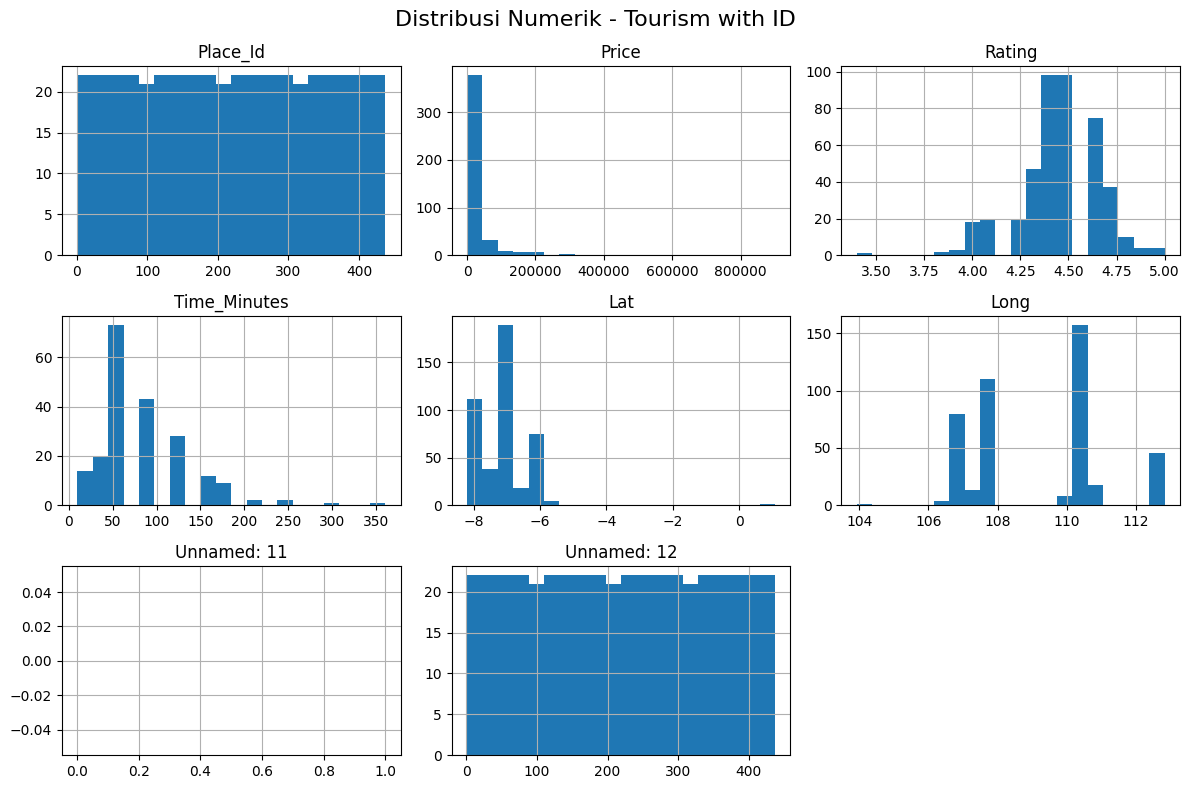

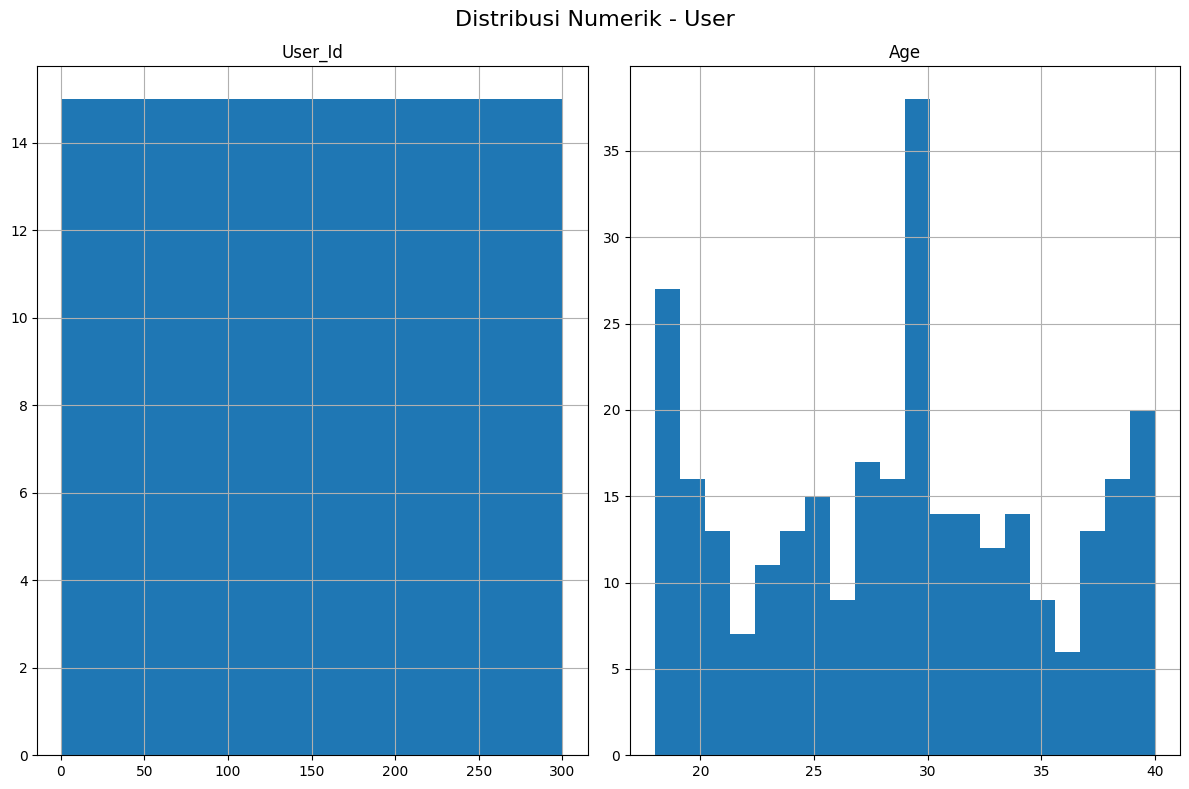

In [ ]:
# Buat list DataFrame numerik
numeric_dfs = [
    df_package.select_dtypes(include='number'),
    df_rating.select_dtypes(include='number'),
    df_tourism.select_dtypes(include='number'),
    df_user.select_dtypes(include='number')
]

# Judul plot untuk setiap DataFrame
titles = ['Package Tourism', 'Tourism Rating', 'Tourism with ID', 'User']

# Loop untuk plotting histogram setiap dataset
for df, title in zip(numeric_dfs, titles):
    df.hist(bins=20, figsize=(12, 8))
    plt.suptitle(f'Distribusi Numerik - {title}', fontsize=16)
    plt.tight_layout()
    plt.show()


### Visualisasi Pairplot

Menampilkan pairplot untuk: Package Tourism


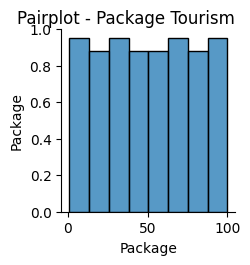

Menampilkan pairplot untuk: Tourism Rating


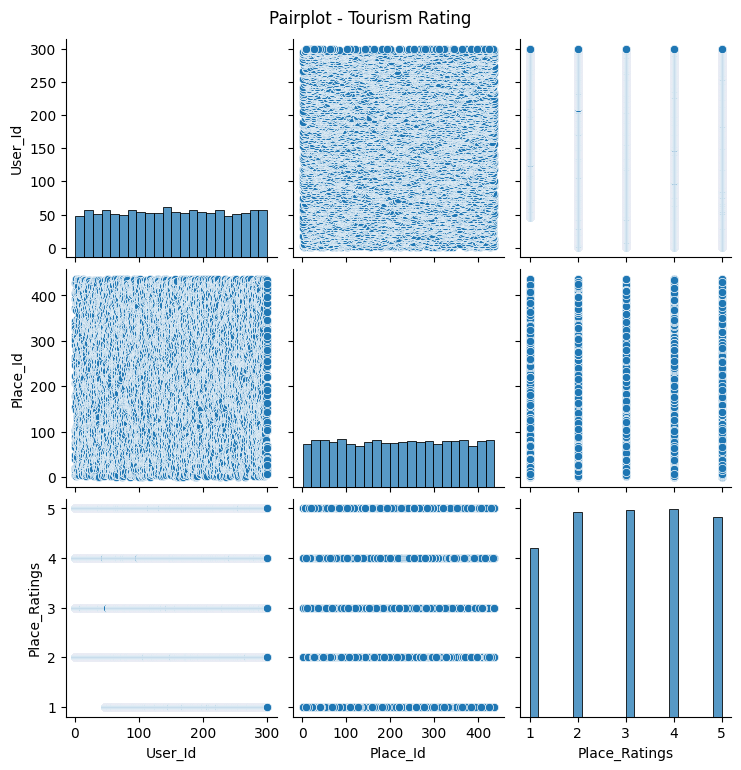

Pairplot dilewati untuk: Tourism with ID (jumlah kolom numerik > 5)
Menampilkan pairplot untuk: User


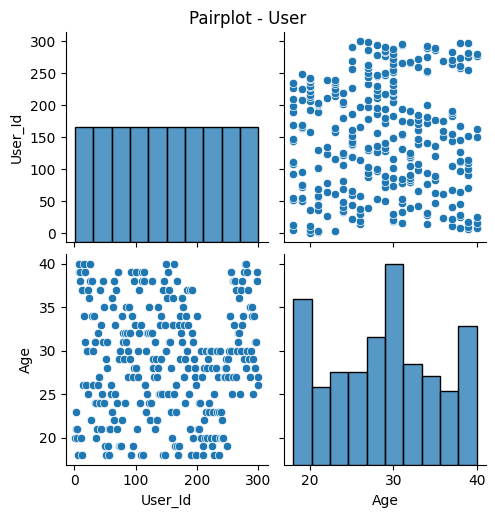

In [ ]:
# Ambil hanya fitur numerik dari setiap DataFrame
numeric_dfs = [
    df_package.select_dtypes(include='number'),
    df_rating.select_dtypes(include='number'),
    df_tourism.select_dtypes(include='number'),
    df_user.select_dtypes(include='number')
]

titles = ['Package Tourism', 'Tourism Rating', 'Tourism with ID', 'User']

# Plot pairplot hanya jika jumlah kolom numerik <= 5
for df, title in zip(numeric_dfs, titles):
    if df.shape[1] <= 5:  # batas maksimal kolom untuk pairplot
        print(f"Menampilkan pairplot untuk: {title}")
        sns.pairplot(df)
        plt.suptitle(f'Pairplot - {title}', y=1.02)
        plt.show()
    else:
        print(f"Pairplot dilewati untuk: {title} (jumlah kolom numerik > 5)")


### Visualisasi Heatmap Korelasi

Heatmap dilewati untuk: Package Tourism (jumlah kolom numerik terlalu sedikit)


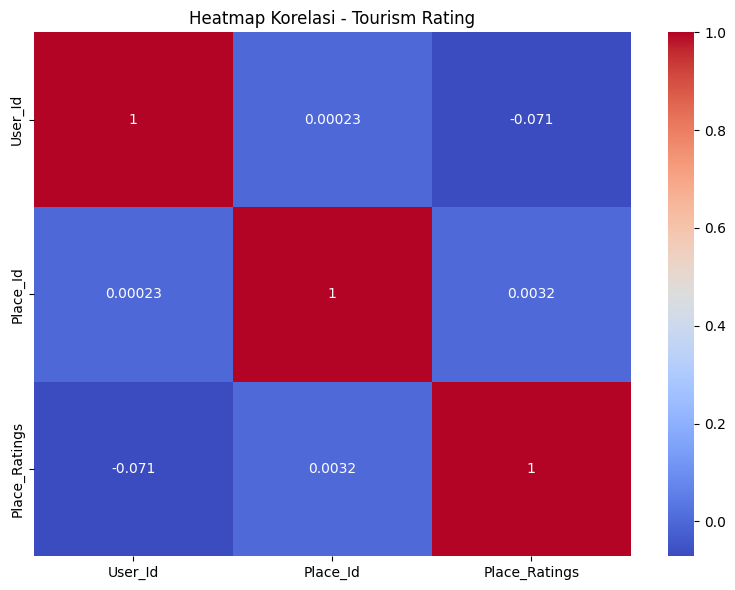

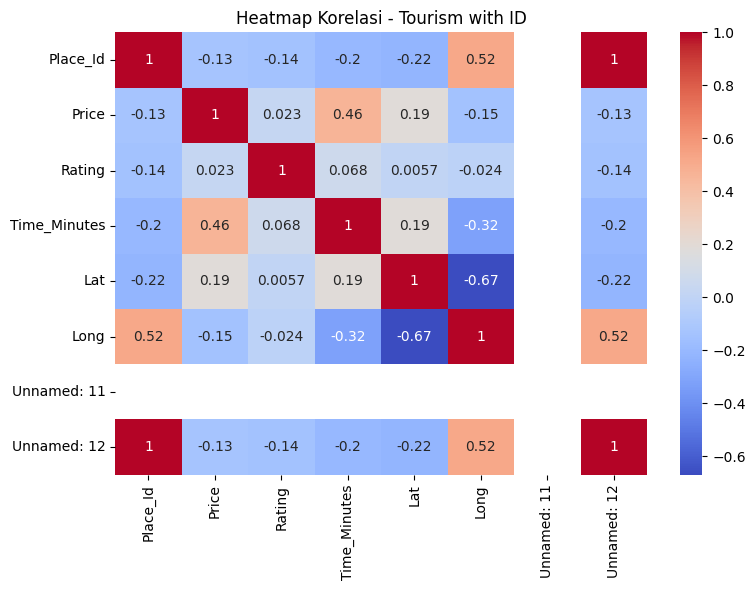

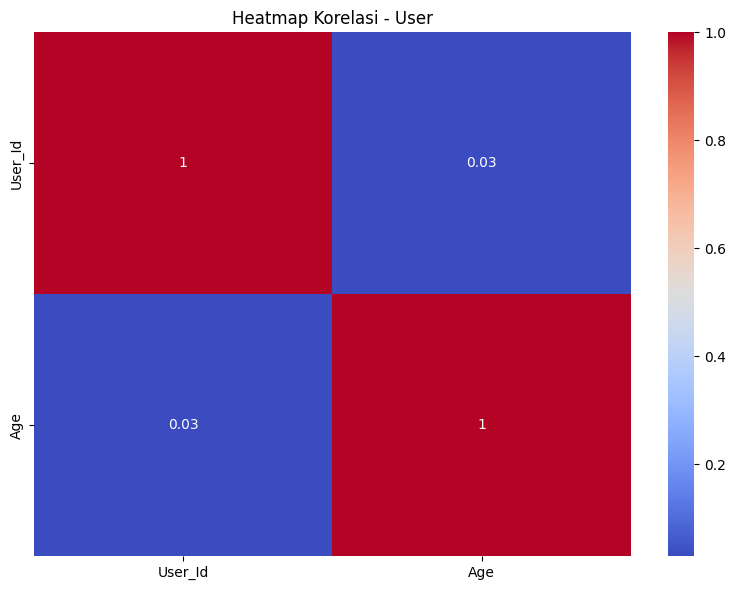

In [ ]:
# Ambil hanya kolom numerik dari masing-masing dataset
numeric_dfs = [
    df_package.select_dtypes(include='number'),
    df_rating.select_dtypes(include='number'),
    df_tourism.select_dtypes(include='number'),
    df_user.select_dtypes(include='number')
]

titles = ['Package Tourism', 'Tourism Rating', 'Tourism with ID', 'User']

# Tampilkan heatmap korelasi jika kolom numerik lebih dari 1
for df, title in zip(numeric_dfs, titles):
    if df.shape[1] > 1:
        plt.figure(figsize=(8, 6))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
        plt.title(f'Heatmap Korelasi - {title}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Heatmap dilewati untuk: {title} (jumlah kolom numerik terlalu sedikit)")


### Visualisasi Distribusi Kategorikal

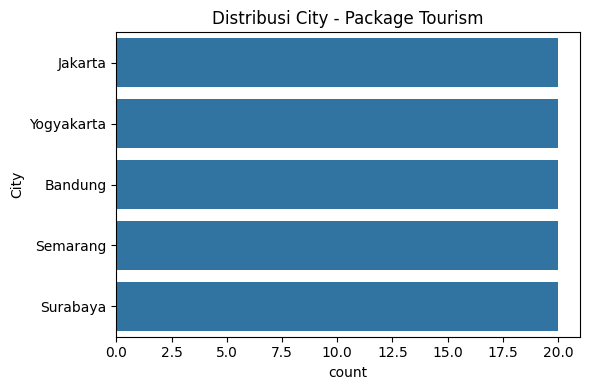

Kolom 'Place_Tourism1' di dataset 'Package Tourism' memiliki terlalu banyak kategori (89) - menampilkan top 15.


<ipython-input-165-3220a01f82e4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


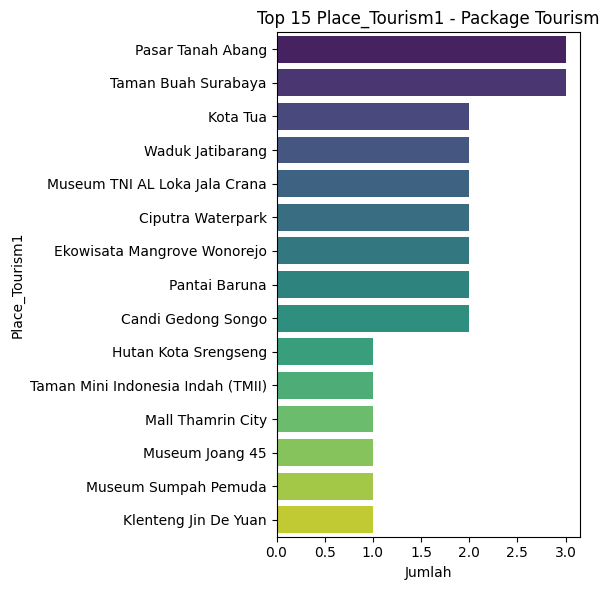

Kolom 'Place_Tourism2' di dataset 'Package Tourism' memiliki terlalu banyak kategori (93) - menampilkan top 15.


<ipython-input-165-3220a01f82e4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


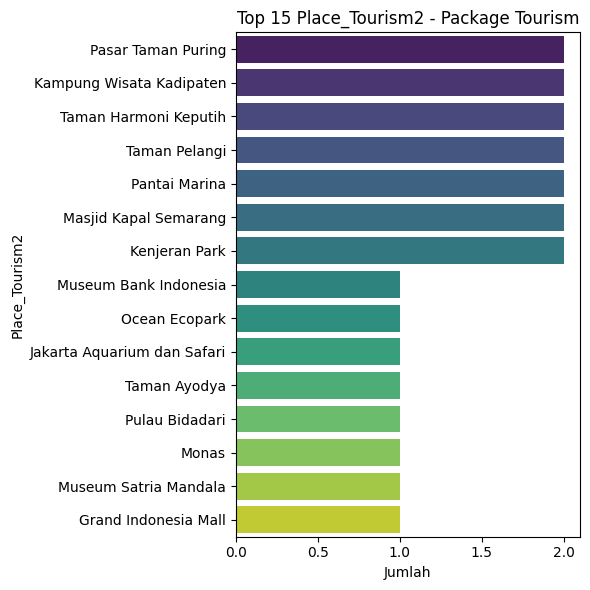

Kolom 'Place_Tourism3' di dataset 'Package Tourism' memiliki terlalu banyak kategori (92) - menampilkan top 15.


<ipython-input-165-3220a01f82e4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


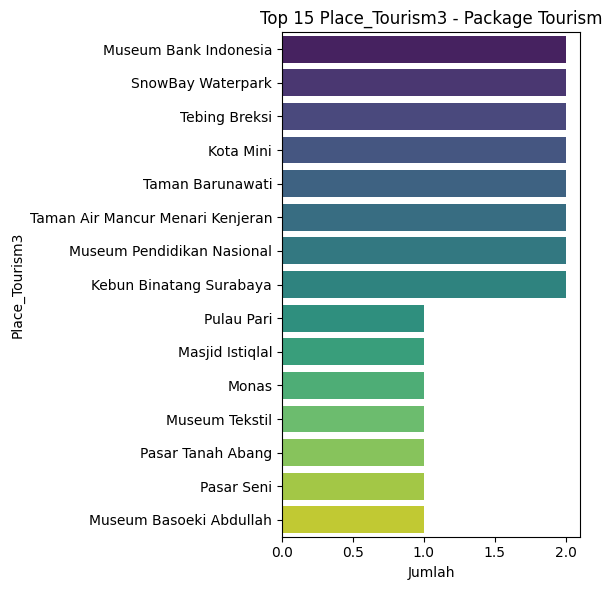

Kolom 'Place_Tourism4' di dataset 'Package Tourism' memiliki terlalu banyak kategori (61) - menampilkan top 15.


<ipython-input-165-3220a01f82e4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


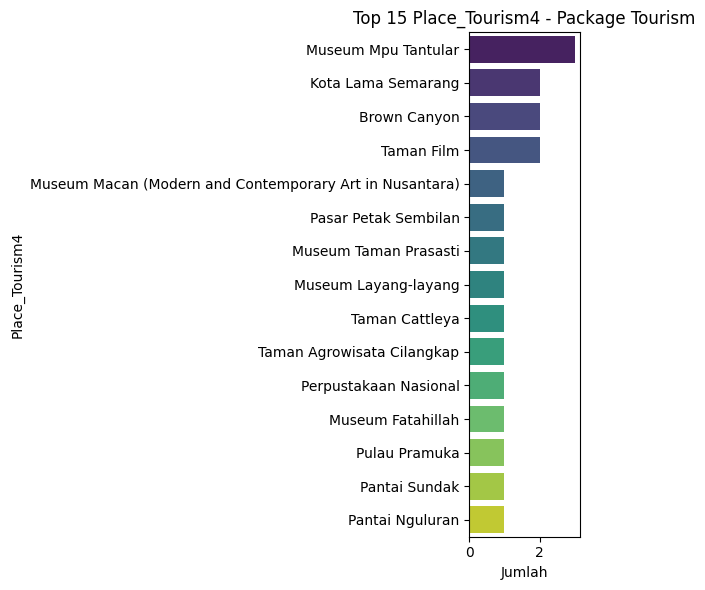

Kolom 'Place_Tourism5' di dataset 'Package Tourism' memiliki terlalu banyak kategori (38) - menampilkan top 15.


<ipython-input-165-3220a01f82e4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


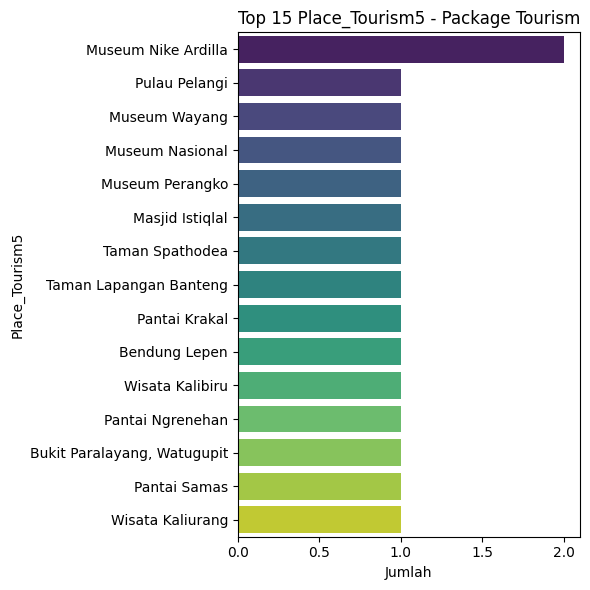

Kolom 'Place_Name' di dataset 'Tourism with ID' memiliki terlalu banyak kategori (437) - menampilkan top 15.


<ipython-input-165-3220a01f82e4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


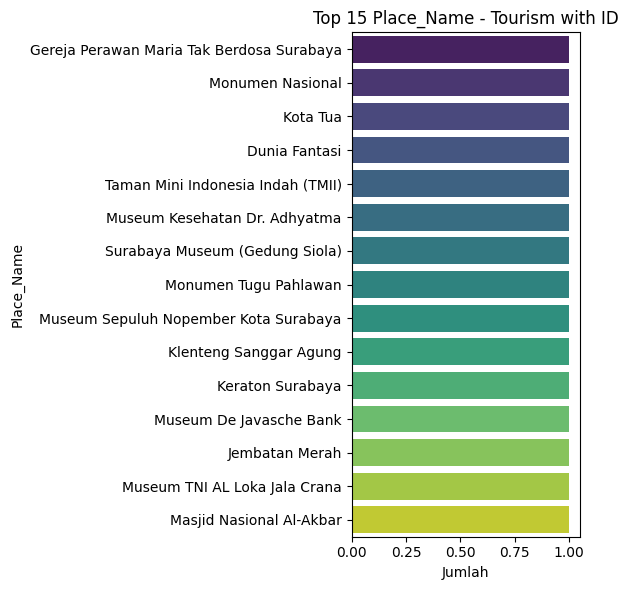

Kolom 'Description' di dataset 'Tourism with ID' memiliki terlalu banyak kategori (437) - menampilkan top 15.


<ipython-input-165-3220a01f82e4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-165-3220a01f82e4>:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


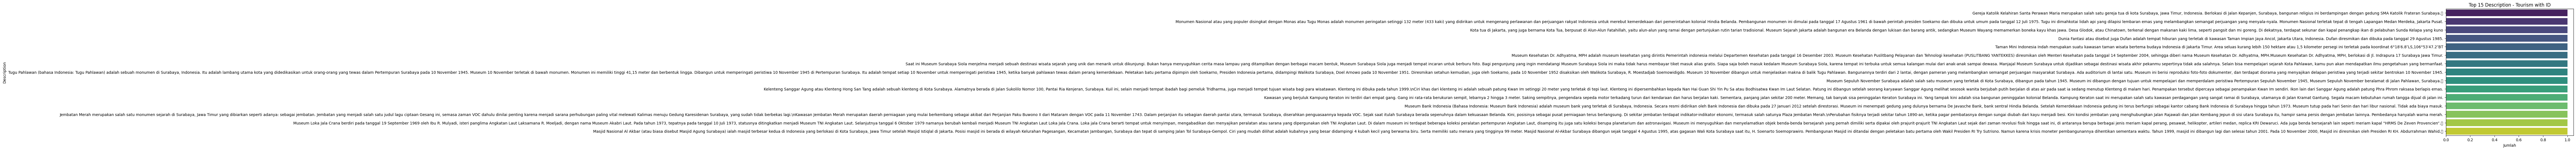

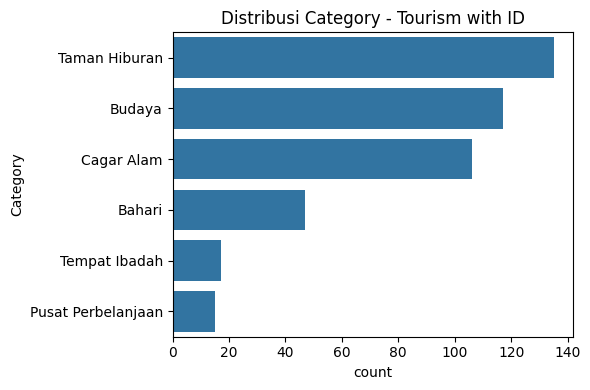

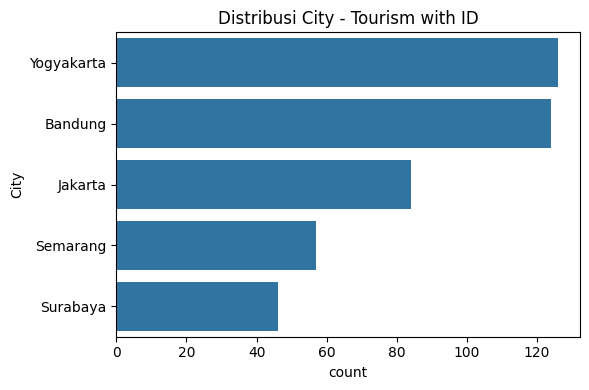

Kolom 'Coordinate' di dataset 'Tourism with ID' memiliki terlalu banyak kategori (437) - menampilkan top 15.


<ipython-input-165-3220a01f82e4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


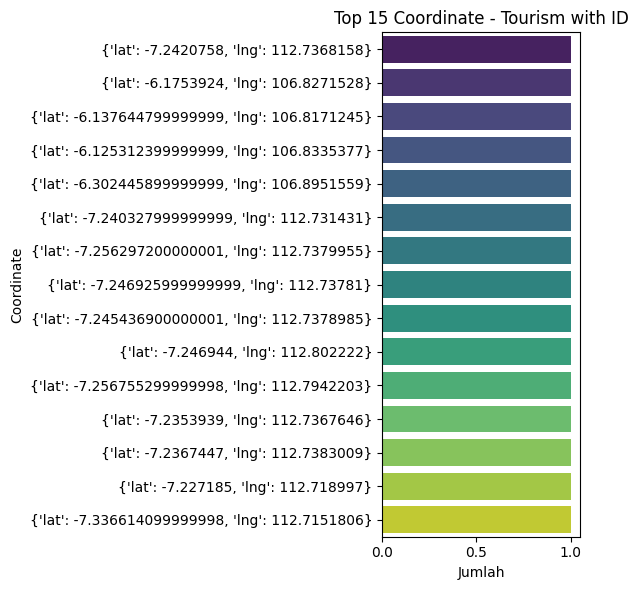

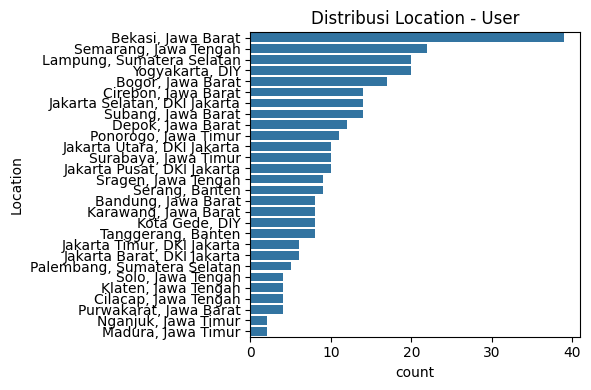

In [ ]:
categorical_dfs = [
    df_package.select_dtypes(include='object'),
    df_rating.select_dtypes(include='object'),
    df_tourism.select_dtypes(include='object'),
    df_user.select_dtypes(include='object')
]

titles = ['Package Tourism', 'Tourism Rating', 'Tourism with ID', 'User']

for df, title in zip(categorical_dfs, titles):
    for col in df.columns:
        unique_vals = df[col].nunique()
        if unique_vals < 30:
            # Visualisasi semua kategori
            plt.figure(figsize=(6, 4))
            sns.countplot(y=col, data=df, order=df[col].value_counts().index)
            plt.title(f'Distribusi {col} - {title}')
            plt.tight_layout()
            plt.show()
        else:
            # Visualisasi top 15 kategori saja
            print(f"Kolom '{col}' di dataset '{title}' memiliki terlalu banyak kategori ({unique_vals}) - menampilkan top 15.")
            top_categories = df[col].value_counts().nlargest(15)
            plt.figure(figsize=(6, 6))
            sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
            plt.title(f'Top 15 {col} - {title}')
            plt.xlabel('Jumlah')
            plt.tight_layout()
            plt.show()


### Statistik Deskriptif Fitur Kategorikal

In [ ]:
# Statistik deskriptif fitur kategorikal
for df, title in zip(categorical_dfs, titles):
    print(f"Statistik deskriptif fitur kategorikal - {title}:\n")
    # Tambahkan cek untuk memastikan DataFrame tidak kosong (memiliki kolom)
    if not df.empty and df.shape[1] > 0:
        print(df.describe(include='object'), "\n")
    else:
        print(f"DataFrame '{title}' tidak memiliki kolom bertipe 'object'.")
        print("\n")

Statistik deskriptif fitur kategorikal - Package Tourism:

           City     Place_Tourism1      Place_Tourism2         Place_Tourism3  \
count       100                100                 100                    100   
unique        5                 89                  93                     92   
top     Jakarta  Pasar Tanah Abang  Pasar Taman Puring  Museum Bank Indonesia   
freq         20                  3                   2                      2   

             Place_Tourism4       Place_Tourism5  
count                    66                   39  
unique                   61                   38  
top     Museum Mpu Tantular  Museum Nike Ardilla  
freq                      3                    2   

Statistik deskriptif fitur kategorikal - Tourism Rating:

DataFrame 'Tourism Rating' tidak memiliki kolom bertipe 'object'.


Statistik deskriptif fitur kategorikal - Tourism with ID:

                                       Place_Name  \
count                                   

### Distribusi Jumlah Rating per User dan per Tempat Wisata

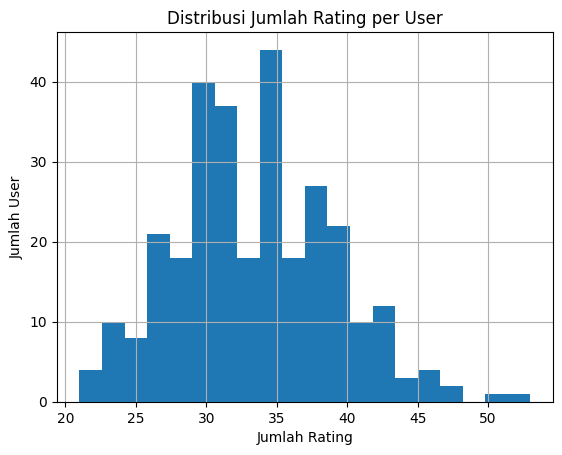

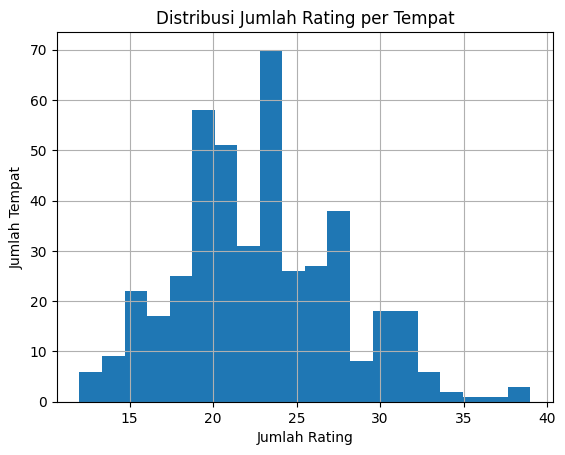

In [ ]:
# Distribusi jumlah rating per user
df_rating['User_Id'].value_counts().hist(bins=20)
plt.title("Distribusi Jumlah Rating per User")
plt.xlabel("Jumlah Rating")
plt.ylabel("Jumlah User")
plt.show()

# Distribusi jumlah rating per tempat
df_rating['Place_Id'].value_counts().hist(bins=20)
plt.title("Distribusi Jumlah Rating per Tempat")
plt.xlabel("Jumlah Rating")
plt.ylabel("Jumlah Tempat")
plt.show()

In [ ]:
# Gabungkan df_rating dan df_wisata berdasarkan Place_Id
rating_data = pd.merge(df_rating, df_tourism, on="Place_Id", how="left")

# Cek hasil merge
print(rating_data.head())

   User_Id  Place_Id  Place_Ratings                     Place_Name  \
0        1       179              3                Candi Ratu Boko   
1        1       344              2                  Pantai Marina   
2        1         5              5       Atlantis Water Adventure   
3        1       373              3         Museum Kereta Ambarawa   
4        1       101              4  Kampung Wisata Sosro Menduran   

                                         Description       Category  \
0  Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...         Budaya   
1  Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...         Bahari   
2  Atlantis Water Adventure atau dikenal dengan A...  Taman Hiburan   
3  Museum Kereta Api Ambarawa (bahasa Inggris: In...         Budaya   
4  Kampung wisata Sosromenduran merupakan kampung...         Budaya   

         City  Price  Rating  Time_Minutes  \
0  Yogyakarta  75000     4.6          90.0   
1    Semarang   3000     4.1           NaN   
2     Jakarta 

## Data Preprocessing

In [ ]:
# Hitung jumlah pengunjung dan rata-rata rating per tempat
agg_rating = rating_data.groupby("Place_Id").agg(
    jumlah_pengunjung=("User_Id", "count"),
    rating_rata2=("Rating", "mean"),
    harga=("Price", "first")  # Ambil harga dari df_tourism
).reset_index()

# Tambahkan label popularitas:
# Misalnya: popular jika rating >= 4 dan jumlah pengunjung >= median
rating_threshold = 4.0
pengunjung_threshold = agg_rating['jumlah_pengunjung'].median()

agg_rating['popularitas'] = np.where(
    (agg_rating['rating_rata2'] >= rating_threshold) &
    (agg_rating['jumlah_pengunjung'] >= pengunjung_threshold),
    1,  # Popular
    0   # Not Popular
)

# Siapkan fitur dan target
X = agg_rating[['rating_rata2', 'jumlah_pengunjung', 'harga']]
y = agg_rating['popularitas']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Tampilkan ukuran data
print(f"Jumlah data train: {X_train.shape[0]}, test: {X_test.shape[0]}")


Jumlah data train: 349, test: 88


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Arsitektur model sederhana
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # karena klasifikasi biner

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6733 - loss: 0.6207 - val_accuracy: 0.8286 - val_loss: 0.4994
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8506 - loss: 0.4946 - val_accuracy: 0.9143 - val_loss: 0.4186
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8773 - loss: 0.4248 - val_accuracy: 0.9429 - val_loss: 0.3557
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9139 - loss: 0.3573 - val_accuracy: 0.9714 - val_loss: 0.3028
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9621 - loss: 0.2993 - val_accuracy: 0.9714 - val_loss: 0.2609
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9623 - loss: 0.2432 - val_accuracy: 0.9714 - val_loss: 0.2319
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9631 - loss: 0.2304 - val_accuracy: 0.9714 - val_loss: 0.2040
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9691 - loss: 0.2042 - val_accuracy: 1.0000 - val_loss: 0.1882
Epo

### Evaluasi model

In [ ]:
# Evaluasi akurasi pada data test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi pada data test: {accuracy:.2f}")

# Prediksi dan ubah ke label biner
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9826 - loss: 0.0485
Akurasi pada data test: 0.99
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


### Laporan evaluasi

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))


Confusion Matrix:
[[36  0]
 [ 1 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.98      0.99        52

    accuracy                           0.99        88
   macro avg       0.99      0.99      0.99        88
weighted avg       0.99      0.99      0.99        88



### Menyimpan Model ke File .h5

In [ ]:
model.save('popularitas_model.h5')
print("Model berhasil disimpan sebagai popularitas_model.h5")


Model berhasil disimpan sebagai popularitas_model.h5


## Penggunaan Model (Inferensi / Deployment)

In [ ]:
from keras.models import load_model
import numpy as np

# Load model
model = load_model('popularitas_model.h5')

# Contoh input baru: rating, jumlah_pengunjung, harga
# (jangan lupa fitur ini harus diskalakan juga dengan StandardScaler yang sama)
input_baru = np.array([[4.2, 250, 150000]])  # rating, jumlah pengunjung, harga

# Gunakan scaler yang sama (jika sudah disimpan)
from sklearn.preprocessing import StandardScaler
# Misalnya kamu sudah simpan scaler sebelumnya:
# scaler = joblib.load('scaler.pkl')
input_baru_scaled = scaler.transform(input_baru)

# Prediksi
prediksi = model.predict(input_baru_scaled)
print("Popular" if prediksi > 0.5 else "Not Popular")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Popular


### Menyimpan ke StandardScaler

In [ ]:
import joblib
joblib.dump(scaler, 'scale_popularitas.pkl')


['scale_popularitas.pkl']

### Visualisasi dan Analisis Kinerja

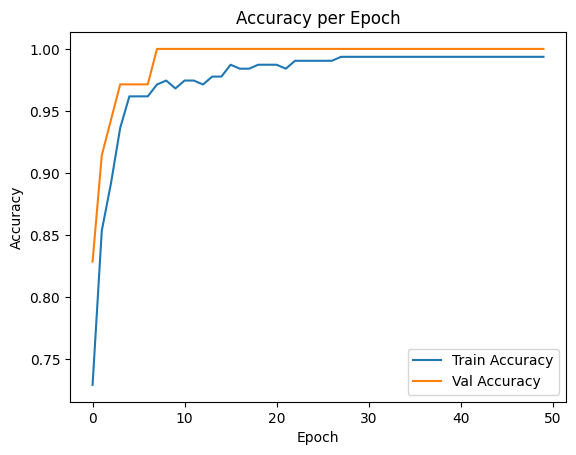

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi akurasi dan loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('popularitas_model.h5')
